In [1]:
import btrdb
import pandas as pd

import time


from datetime import datetime, timedelta

from matplotlib import pyplot as plt
from btrdb.utils import timez

db = btrdb.connect()

In [2]:
streams = db.streams_in_collection('streaming/zurich', 
                                   tags={'unit': 'Volt'})

# latest = streams[-1].latest()[0].time
latency = pd.Series(0, index=range(100))
tstamp = pd.Series(0, index=range(100))
for ix in latency.index:
    last_insert = streams[0].nearest(timez.currently_as_ns(), 0, backward=True)[0].time
    now = timez.currently_as_ns()
    latency.loc[ix] = (now-last_insert)/1e9
    tstamp.loc[ix] = last_insert
    time.sleep(0.1)


<AxesSubplot:>

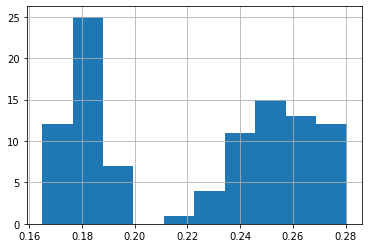

In [3]:
latency.hist()